In [63]:
import pandas as pd

file_path = "../web_service_dataset.csv"
df_original = pd.read_csv(file_path)

In [64]:
df_original

,src_ip,src_port,dst_ip,dst_port,proto,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,...,b_std_dev_ps,b_flowStart,b_flowEnd,b_flowDuration,b_min_piat,b_max_piat,b_avg_piat,b_std_dev_piat,category,web_service
0,192.168.121.1,67,172.16.255.185,67,UDP,22,7620,328,394,346.363636,...,2.000000,1.555955e+09,1.555955e+09,1.554399e+12,1.035380e-02,198.657965,51.689181,84.916348,Network,DHCP
1,192.168.121.1,67,172.16.255.186,67,UDP,17,5670,328,354,333.529412,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
2,192.168.121.1,67,172.16.255.185,67,UDP,43,15124,328,394,351.720930,...,1.332347,1.555964e+09,1.555965e+09,1.554409e+12,2.233195e-02,340.268454,89.927588,124.270745,Network,DHCP
3,192.168.121.1,67,172.16.255.186,67,UDP,30,10086,328,352,336.200000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,DHCP
4,192.168.121.1,0,10.130.1.166,0,ICMP,1,56,56,56,56.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,Network,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,192.168.128.252,137,172.16.255.186,137,UDP,9,702,78,78,78.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704835,192.168.128.252,138,172.16.255.185,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704836,192.168.128.252,138,172.16.255.186,138,UDP,3,687,229,229,229.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,System,NetBIOS
2704837,192.168.128.252,49879,108.177.11.188,5228,TCP,75,3520,40,66,46.933333,...,4.228907,1.559770e+09,1.559771e+09,1.558211e+12,1.150203e-02,90.155711,44.999017,14.822745,Web,Google


In [65]:
# 3.1

from sklearn.preprocessing import StandardScaler

df_copy = df_original.copy()
# Define label (non-numerical) columns
label_columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'category', 'web_service', 'proto']

# Store the label columns in a separate DataFrame
df_labels = df_copy[label_columns]

# Drop label columns from the numerical dataset
df_copy = df_copy.drop(label_columns, axis=1)

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

# Create a new DataFrame with scaled numerical data
df_scaled = pd.DataFrame(scaled_data, columns=df_copy.columns)

# Add the label columns back to the scaled DataFrame
df_scaled = pd.concat([df_scaled, df_labels.reset_index(drop=True)], axis=1)

# Confirm scaling
print("Scaled data shape:", df_scaled.shape)

web_service_categories = df_scaled.groupby('web_service')['category'].nunique()

web_services_multiple_categories = web_service_categories[web_service_categories > 1]
print("Number of web services with multiple traffic categories:", len(web_services_multiple_categories))

most_categories_service = web_service_categories.idxmax()
most_categories_count = web_service_categories.max()

print("Web service with the most traffic categories:", most_categories_service)
print("Number of categories:", most_categories_count)



Scaled data shape: (2704839, 46)
Number of web services with multiple traffic categories: 5
Web service with the most traffic categories: DNS
Number of categories: 4


In [66]:
df_scaled

,pktTotalCount,octetTotalCount,min_ps,max_ps,avg_ps,std_dev_ps,flowStart,flowEnd,flowDuration,min_piat,...,b_max_piat,b_avg_piat,b_std_dev_piat,src_ip,src_port,dst_ip,dst_port,category,web_service,proto
0,-0.017654,-0.018223,4.478531,-0.290998,0.344931,-0.466290,-0.800156,-0.799133,9.045503,-0.055404,...,2.987091,1.279851,4.959656,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
1,-0.018969,-0.018580,4.478531,-0.304607,0.307364,-0.495915,-0.800156,-0.799133,9.045503,-0.055098,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
2,-0.012135,-0.016847,4.478531,-0.290998,0.360613,-0.464258,-0.793921,-0.793053,7.670823,-0.055407,...,5.300328,2.308934,7.373345,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
3,-0.015552,-0.017770,4.478531,-0.305287,0.315181,-0.494202,-0.793921,-0.793053,7.670822,-0.054947,...,-0.258028,-0.111224,-0.248445,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
4,-0.023174,-0.019609,-0.037019,-0.405993,-0.505003,-0.512978,-0.792105,-0.792138,-0.294316,-0.055414,...,-0.258028,-0.111224,-0.248445,192.168.121.1,0,10.130.1.166,0,Network,ICMP,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,-0.021071,-0.019491,0.328210,-0.398508,-0.440606,-0.512978,1.569307,1.569882,5.082190,-0.032670,...,-0.258028,-0.111224,-0.248445,192.168.128.252,137,172.16.255.186,137,System,NetBIOS,UDP
2704835,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841174,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.185,138,System,NetBIOS,UDP
2704836,-0.022648,-0.019494,2.835004,-0.347135,0.001392,-0.512978,1.569058,1.569918,7.602423,21.841178,...,-0.258028,-0.111224,-0.248445,192.168.128.252,138,172.16.255.186,138,System,NetBIOS,UDP
2704837,-0.003724,-0.018974,-0.302639,-0.402591,-0.531542,-0.500497,1.569050,1.570078,9.092950,-0.055064,...,1.214685,1.099803,0.660666,192.168.128.252,49879,108.177.11.188,5228,Web,Google,TCP


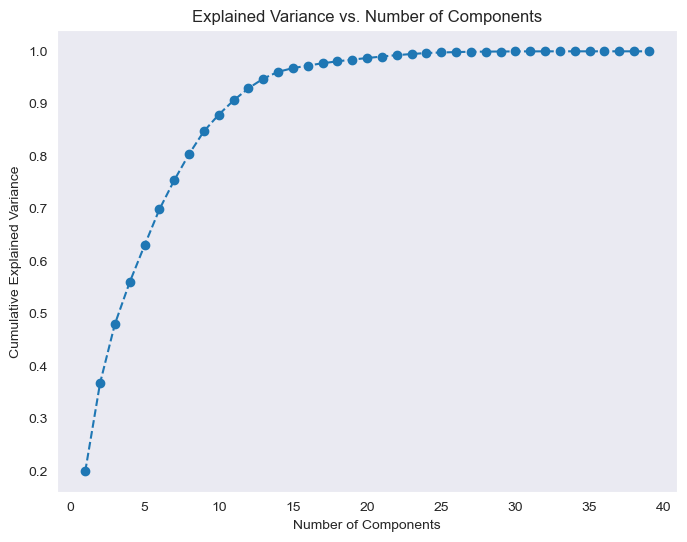

Number of components to save 90% variance: 11
Transformed dataset shape: (2704839, 18)


In [67]:
# 3.2

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Select only columns of the features (PCA works only with features)
df_scaled_features = df_scaled.drop(label_columns, axis=1)

# creating a PCA
pca = PCA()
pca.fit(df_scaled_features)

# computing cumulative explained variance 
cumul_variance =  np.cumsum(pca.explained_variance_ratio_)

# make the plot of cumulative explained variance wrt number of components
# through this graph we can see how variance is increasing while adding new components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumul_variance) + 1), cumul_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# here we need to see how many components we need to save with this variance threshold 
threshold = 0.9

num_com = (cumul_variance >= threshold).argmax() + 1

print(f"Number of components to save 90% variance: {num_com}")

# so here we will create new PCA with fixed numbers of components
pca_selected = PCA(n_components=num_com)

# and transform data

pca_data = pca_selected.fit_transform(scaled_data)

# and here we will create a new dataset with different components and data
# columns is the main components

df_pca = pd.DataFrame(pca_data)


df_pca = pd.concat([df_pca, df_labels.reset_index(drop=True)], axis=1)

print("Transformed dataset shape:", df_pca.shape)



In [68]:
# 3.2
df_pca

,0,1,2,3,4,5,6,7,8,9,10,src_ip,src_port,dst_ip,dst_port,category,web_service,proto
0,10.265629,-3.125388,0.246477,-1.433726,0.149088,3.404355,-3.249564,6.304175,-6.362348,-0.293745,1.463653,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
1,8.231046,-4.002364,0.741956,1.563438,-4.457090,3.671469,-5.512554,3.269379,-3.345849,-0.150270,1.111530,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
2,10.323759,-2.867958,0.072356,-1.931808,1.409580,3.863603,-2.971120,7.596938,-5.255861,-0.344581,1.856280,192.168.121.1,67,172.16.255.185,67,Network,DHCP,UDP
3,7.067660,-3.565378,0.664477,1.493444,-4.182588,3.713640,-5.256524,3.688709,-2.682819,-0.146886,1.109034,192.168.121.1,67,172.16.255.186,67,Network,DHCP,UDP
4,-1.269196,-1.790586,0.413616,0.031567,-2.142481,0.259298,-1.818365,-0.301036,2.216678,0.215610,-0.645229,192.168.121.1,0,10.130.1.166,0,Network,ICMP,ICMP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704834,14.402512,-6.404638,0.440342,3.441146,1.544169,3.433249,-8.556845,0.944285,-2.457660,0.858604,-3.880305,192.168.128.252,137,172.16.255.186,137,System,NetBIOS,UDP
2704835,23.377368,-12.433620,1.734340,8.361292,-15.610620,-9.494147,3.132589,-13.582214,-13.257483,-0.634814,2.275672,192.168.128.252,138,172.16.255.185,138,System,NetBIOS,UDP
2704836,23.377366,-12.433620,1.734340,8.361292,-15.610622,-9.494149,3.132592,-13.582217,-13.257484,-0.634814,2.275674,192.168.128.252,138,172.16.255.186,138,System,NetBIOS,UDP
2704837,6.404195,-2.150704,0.304085,1.500264,3.387908,2.171169,-2.934419,-0.614924,-2.907800,-0.173370,1.223082,192.168.128.252,49879,108.177.11.188,5228,Web,Google,TCP


['Network' 'Web' 'SoftwareUpdate' 'Unspecified' 'RPC' 'System' 'Cloud'
 'Email' 'Media' 'Streaming' 'VoIP' 'Collaborative' 'Music'
 'SocialNetwork' 'Video' 'Download-FileTransfer-FileSharing' 'Chat' 'VPN'
 'RemoteAccess' 'Game' 'Database' 'Mining' 'Shopping' 'DataTransfer']


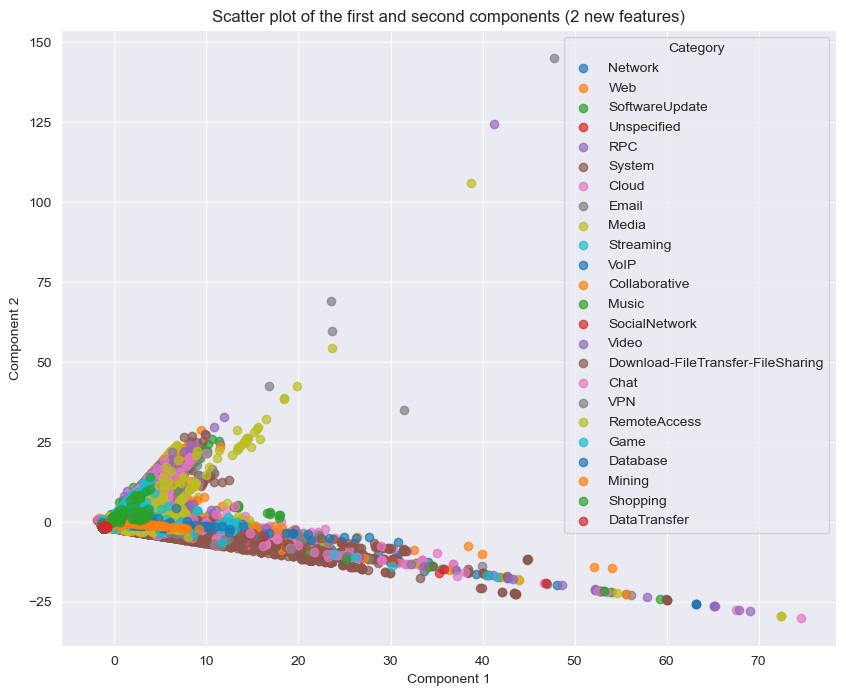

In [69]:
# 3.3
import matplotlib.pyplot as plt

# Randomly select an equal number of samples from each category

sample = 10000

sampled_data = (
    df_pca.groupby('category')
    .head(sample)
    .reset_index(drop=True)
)

pca_1 = sampled_data[0]  # first component 
pca_2 = sampled_data[1]  # second component 
categories = sampled_data['category']  # select labels

print(categories.unique())

# Create a scatter plot
plt.figure(figsize=(10, 8))

for category in categories.unique():
    category_data = sampled_data[sampled_data['category'] == category]
    plt.scatter(category_data[0], category_data[1], label=category, alpha=0.7)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter plot of the first and second components (2 new features)')
plt.legend(title='Category', loc='best')

plt.show()

# Can you visually tell apart different categories? - I need to think about it


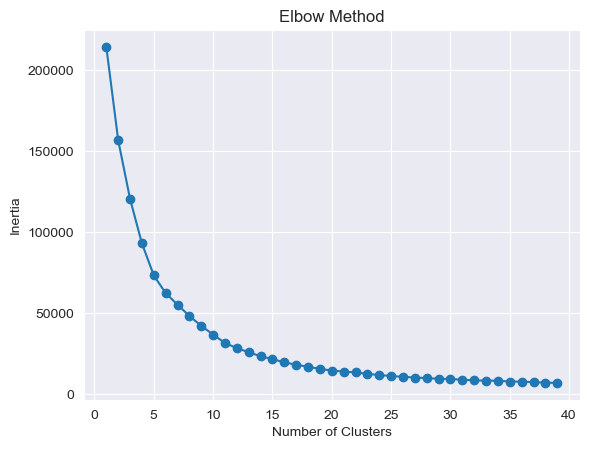

The clustered labels are:
 [1 1 1 ... 0 0 0]

The centroids are:
 [[-1.30771693e+00 -1.17523541e+00  2.35522904e-01 -1.40313610e+00
  -4.85085688e-01 -4.28268948e-01 -1.81941338e-01  1.43403237e-01
  -1.58424019e-02  1.01310319e-01 -4.21216215e-01]
 [ 1.17361973e+00  1.33166314e+00 -3.74986041e-01 -1.28738200e+00
  -2.40235264e-01  1.09150409e+00  5.42571532e-02 -3.93747689e-01
   3.31373004e-02 -1.23312206e-01  4.30260592e-01]
 [ 3.20477150e+00  8.58074227e+00 -1.89676896e+00  1.03882290e+00
  -4.13608056e+00  9.90470050e+00  7.77486734e+00 -1.00064029e+00
  -6.69883704e-01 -2.85817098e-01 -6.18762177e+00]
 [ 3.61453267e+00  1.07368687e+01 -1.70655672e+00 -4.94022065e-01
  -1.81211157e+00 -4.04451446e+00 -2.15596062e+00  1.02720910e+00
   5.02879653e-01  6.64323830e-01 -7.70038807e-01]
 [ 1.98171594e+01 -8.46806933e+00  5.60927434e-01 -5.05614013e-01
  -3.34339695e+00 -1.99816742e+00  6.96577503e-03 -4.12357767e-01
  -1.50955756e+00  9.18568341e-02 -4.28390526e-01]]



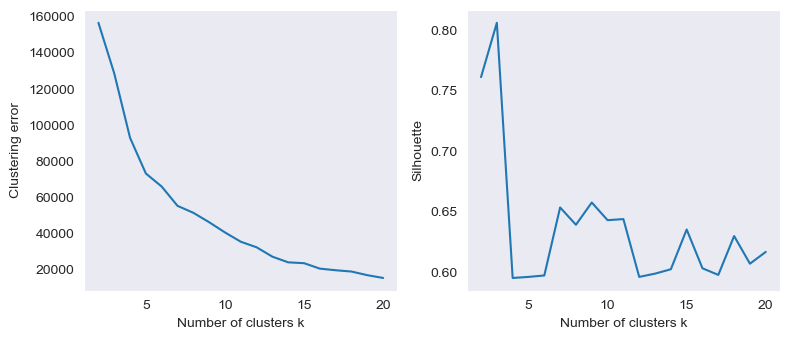

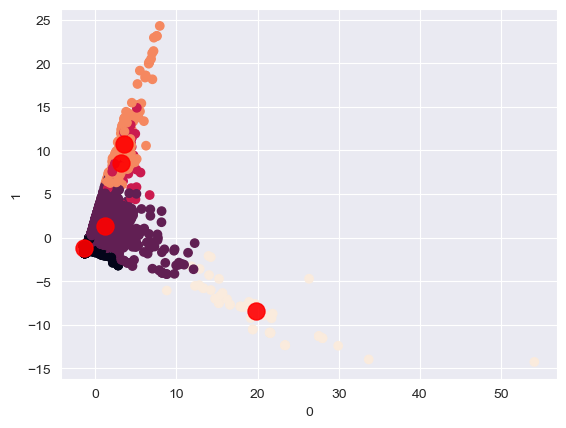

In [124]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

df_copy = df_pca.copy()

df_copy = df_copy[0:10000]

label_columns = ['src_ip', 'src_port', 'dst_ip', 'dst_port', 'category', 'web_service', 'proto']

features_dataset = df_copy.drop(label_columns, axis=1)

inertia = []
clusters_range = range(1, 40)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(features_dataset)
    inertia.append(kmeans.inertia_)

plt.plot(clusters_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# kmeans section

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=None, n_init=10)

kmeans.fit(features_dataset)

kmeans_results = []

# print the clustered labels
print('The clustered labels are:\n', kmeans.labels_)
print()

# print the centroid of each feature for each cluster
print('The centroids are:\n', kmeans.cluster_centers_)
print()

for k in range(2, 21):
    kmeans_results.append(KMeans(n_clusters=k).fit(features_dataset))
    
fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [k for k in range(2,21)], 
    [result.inertia_ for result in kmeans_results]
)
axs[0].set_xlabel("Number of clusters k")
axs[0].set_ylabel("Clustering error")
axs[0].grid()

axs[1].plot(
    [k for k in range(2,21)], 
    [silhouette_score(features_dataset, result.labels_) for result in kmeans_results]
)
axs[1].set_xlabel("Number of clusters k")
axs[1].set_ylabel("Silhouette")
axs[1].grid()

plt.tight_layout()
plt.show()

# Here the two plots show contrasting objectives: for clustering error, increasing k will improve the results, while for silhouette increasing k will worsen the results. For clustering error, the addition of an additional cluster cannot result in a larger average distance from the points to their corresponding cluster means. It naturally follows that the raw clustering error will always favour a larger number. Hence, by looking at the silhouette a small number of k is more appropriate.

# Helper function to plot the clustering -- only 2 dimensione (if more, it will plot only the first two columns).
def plot_clustering(X, labels, centers=None, title="", subplot=None):

    # Plot in given subplot
    if subplot:
        plt.subplot(subplot)

    # Plot data with labels as color
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)

    # Plot centers if given
    if centers is not None:
        plt.scatter(
            centers[:, 0], centers[:, 1], c="red", s=150, alpha=0.9, label="Centers"
        )

    # Set title
    plt.title(title)
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])
    
plot_clustering(features_dataset, kmeans.labels_, kmeans.cluster_centers_)

The clustered labels are:
 [-1 -1 -1 ...  5  5  5]

Estimated number of clusters: 9
Estimated number of noise points: 946


ValueError: Boolean array expected for the condition, not object

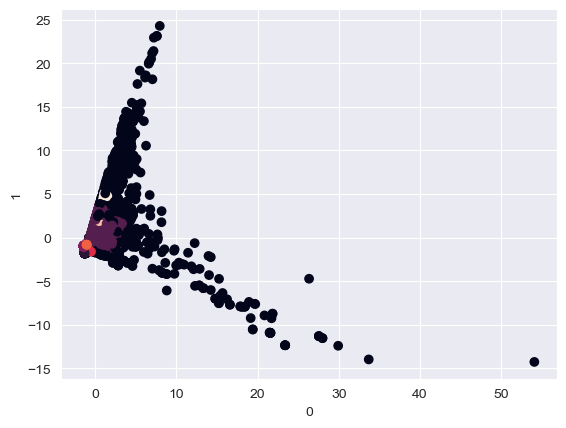

In [115]:
# 3.4

dbscan = DBSCAN(eps=0.7, min_samples=22)
dbscan.fit(features_dataset)
print('The clustered labels are:\n', dbscan.labels_)
print()

plot_clustering(features_dataset, dbscan.labels_)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise_ = list(dbscan.labels_).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

dbscan_results = []
for eps in np.arange(0.05, 0.9, .1): #from 0.05 to 0.9 with steps of 0.1
    dbscan_tmp = DBSCAN(eps=eps, min_samples=3)
    dbscan_tmp.fit(features_dataset)
    dbscan_results.append((eps, dbscan_tmp))
    
dbscan_tmp = DBSCAN(eps=0.05, min_samples=3)
dbscan_tmp.fit(features_dataset)
dbscan_tmp.labels_

silhouettes_dbscan = []
silhouettes_dbscan_noOutliers= []

for eps, dbscan_result in dbscan_results:

    # compute silhouette score
    score = silhouette_score(features_dataset, dbscan_result.labels_)
    silhouettes_dbscan.append((eps, score))
    
    # compute silhouette score only of clustered samples (not noise, i.e., not -1)
    score = silhouette_score(
        df_pca[~df_pca.index.isin(np.where(dbscan_result.labels_ == -1)[0])][features_dataset], 
        np.delete(dbscan_result.labels_, np.where(dbscan_result.labels_ == -1))
    )
    silhouettes_dbscan_noOutliers.append((eps, score))
    

fig, axs = plt.subplots(1,2, figsize=(8, 3.5))

axs[0].plot(
    [eps for (eps, _) in silhouettes_dbscan], 
    [score for (_, score) in silhouettes_dbscan] 
)
axs[0].set_xlabel("eps")
axs[0].set_ylabel("Silhouette")
axs[0].set_title("Average silhouette for all points")
axs[0].grid()

axs[1].plot(
    [eps for (eps, _) in silhouettes_dbscan_noOutliers], 
    [score for (_, score) in silhouettes_dbscan_noOutliers] 
)
axs[1].set_xlabel("eps")
axs[1].set_ylabel("Silhouette")
axs[1].set_title("Average silhouette without considering outliers")
axs[1].grid()

plt.tight_layout()
plt.show()
   


In [100]:
features_dataset

,0,1,2,3,4,5,6,7,8,9,10
0,10.265629,-3.125388,0.246477,-1.433726,0.149088,3.404355,-3.249564,6.304175,-6.362348,-0.293745,1.463653
1,8.231046,-4.002364,0.741956,1.563438,-4.457090,3.671469,-5.512554,3.269379,-3.345849,-0.150270,1.111530
2,10.323759,-2.867958,0.072356,-1.931808,1.409580,3.863603,-2.971120,7.596938,-5.255861,-0.344581,1.856280
3,7.067660,-3.565378,0.664477,1.493444,-4.182588,3.713640,-5.256524,3.688709,-2.682819,-0.146886,1.109034
4,-1.269196,-1.790586,0.413616,0.031567,-2.142481,0.259298,-1.818365,-0.301036,2.216678,0.215610,-0.645229
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.420373,0.251736,-0.159994,-1.421597,-0.160776,0.941574,0.538128,-0.943127,0.171279,-0.248136,0.945861
9996,0.352527,2.468801,-0.416446,-0.920817,-0.929647,3.361690,2.598913,-1.347331,-0.135188,-0.291119,-1.031362
9997,-1.024976,-0.812278,0.106434,-1.473060,-0.171523,0.007041,-0.154027,-0.618971,0.257996,-0.077023,0.547259
9998,-1.024981,-0.812277,0.106434,-1.473055,-0.171520,0.007041,-0.154027,-0.618971,0.257996,-0.077023,0.547259
